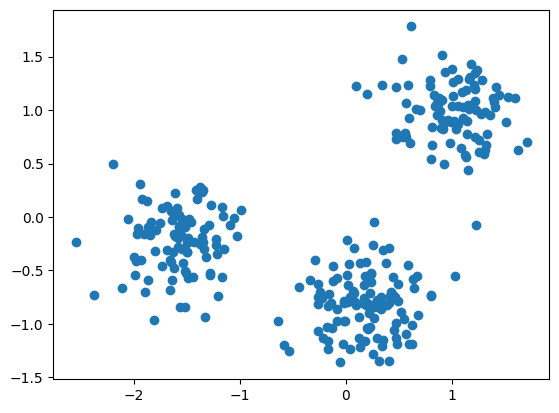

In [33]:
"""Load the dataset ClusterDs1.csv from the Moodle page into a DataFrame and 
make a scatter plot using the plt.scatter() function"""

import  pandas as pd
import matplotlib.pylab as plt

df1 = pd.read_csv('ClusterDs1.csv')
vals1 = df1.values
plt.scatter(vals1[:, 0], vals1[:, 1])

In [34]:
"""From the scatter plot of the previous exercise, you got a good idea of how many 
cluster the data represents. Now create a K-Means model to find the clusters, and fit 
it to the data points from the previous exercise"""

from sklearn.cluster import KMeans

km = KMeans(
    n_clusters = 3,   # number of clusters
    init = 'random',  # centroid initialisation
    n_init = 10,      # number of executions
    max_iter = 300,   # number of iterations
    random_state = 0  # random seed
)

df1_arr = df1.to_numpy()
y_km = km.fit(df1_arr)

y_km

KMeans(init='random', n_clusters=3, n_init=10, random_state=0)

In [35]:
"""Using the model trained in the previous step, use the predict() method to get a list 
of cluster labels. Assign the result to a variable named labels"""

labels = y_km.predict(df1_arr)
labels

array([0, 2, 1, 1, 2, 2, 1, 0, 2, 2, 1, 0, 2, 1, 2, 0, 1, 1, 0, 1, 2, 0,
       2, 0, 0, 2, 0, 0, 0, 2, 1, 1, 1, 2, 0, 2, 0, 0, 2, 0, 0, 1, 2, 2,
       2, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 2, 0, 0, 2, 1, 2, 0, 0, 1, 1, 2,
       1, 2, 2, 0, 1, 2, 1, 0, 1, 2, 0, 0, 0, 1, 0, 2, 1, 2, 2, 2, 2, 0,
       0, 1, 2, 1, 2, 0, 0, 0, 1, 2, 2, 1, 2, 0, 2, 1, 0, 1, 1, 1, 2, 2,
       0, 2, 1, 2, 2, 2, 0, 2, 1, 1, 0, 0, 0, 0, 0, 2, 1, 0, 2, 2, 1, 1,
       2, 0, 2, 0, 1, 2, 1, 0, 1, 1, 0, 1, 1, 0, 1, 2, 0, 0, 0, 1, 1, 2,
       1, 2, 0, 0, 1, 2, 1, 1, 1, 2, 0, 0, 2, 1, 1, 0, 0, 1, 0, 0, 2, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 2, 1, 0, 0, 0, 0, 2, 1, 0, 2, 2, 2,
       0, 2, 0, 0, 2, 1, 1, 0, 1, 0, 0, 2, 2, 0, 1, 2, 1, 0, 1, 2, 0, 2,
       2, 2, 2, 1, 1, 1, 0, 0, 2, 0, 1, 2, 0, 0, 2, 0, 1, 1, 1, 1, 1, 2,
       0, 0, 1, 1, 0, 2, 1, 2, 2, 0, 0, 2, 2, 2, 0, 1, 0, 2, 0, 1, 1, 1,
       1, 1, 0, 0, 2, 0, 0, 2, 1, 1, 2, 0, 1, 1, 2, 2, 0, 0, 0, 2, 2, 0,
       1, 2, 2, 1, 0, 0, 0, 2, 0, 0, 0, 2, 2, 2], d

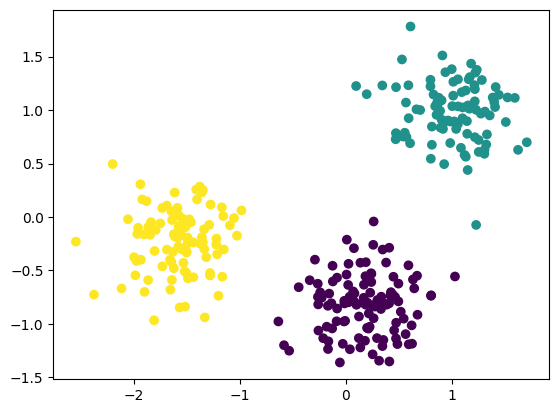

In [36]:
"""Using the labels from the previous exercise, update the plot to show points in 
different colour depending on what cluster they belong"""

plt.scatter(vals1[:,0],vals1[:,1], c=labels); 
plt.show()

In [39]:
""" Load the dataset ClusterDs2.csv from the Moodle page into a separate DataFrame. 
Using the model trained from the previous step, use the predict() method to get a 
list of cluster labels for the data. Assign the result to a variable named 
predicted_labels"""

df2 = pd.read_csv('ClusterDs2.csv')
df2_arr = df2.to_numpy()
predicted_labels = y_km.predict(df2_arr)
predicted_labels


array([1, 2, 2, 0, 0, 1, 0, 0, 2, 0, 0, 2, 0, 1, 1, 0, 1, 1, 0],
      dtype=int32)

In [74]:
"""For each data point in the DataFrame of the previous step, calculate the Euclidean 
distance to each of the centroids of the cluster model. You can obtain the 
coordinates of the centroids using the .cluster_centers_ attribute of K-Means 
model."""

from scipy.spatial import distance
from math import inf
import numpy as np

#print(df2_arr)

centroids = y_km.cluster_centers_
#print(centroids)

close_dist=[]

for a in df2_arr:
    min = inf
    for b in centroids:
        dist = distance.euclidean(a, b)
        if dist < min:
            min = dist
            ctr = b
        print("Distance between {0} and {1} = {2}".format(a,b,dist))
    close_dist.append(ctr)

[[ 0.18034887 -0.81701955]
 [ 1.01378685  0.98288627]
 [-1.57568905 -0.22531944]]
Distance between [0.97385117 0.92917238] and [ 0.18034887 -0.81701955] = 1.9180282011782674
Distance between [0.97385117 0.92917238] and [1.01378685 0.98288627] = 0.06693310462403469
Distance between [0.97385117 0.92917238] and [-1.57568905 -0.22531944] = 2.79875091600772
Distance between [-1.83908852  0.34850623] and [ 0.18034887 -0.81701955] = 2.331646993736332
Distance between [-1.83908852  0.34850623] and [1.01378685 0.98288627] = 2.922556400514368
Distance between [-1.83908852  0.34850623] and [-1.57568905 -0.22531944] = 0.6313914611198794
Distance between [-1.04509772  0.07246805] and [ 0.18034887 -0.81701955] = 1.5142349697615558
Distance between [-1.04509772  0.07246805] and [1.01378685 0.98288627] = 2.2511923521219614
Distance between [-1.04509772  0.07246805] and [-1.57568905 -0.22531944] = 0.6084443687161787
Distance between [ 0.82027371 -0.7102251 ] and [ 0.18034887 -0.81701955] = 0.6487748938

In [81]:
"""Using the distance values calculated in the previous step, add a new column to the 
DataFrame from Step 5 to store the a value representing the index of the centroid that 
the point is closer to – e.g., 0 if the data point is closer to centroid 0, 1 if the data 
point is closer to centroid 1, and so forth."""

#print(df2)
#print(close_dist)

closest_centroids = []

for coords in close_dist:
    if coords in centroids:
        closest_centroids.append(np.where(centroids==coords)[0][0])

#print(closest_centroids)

df2['Closest Centroids'] = closest_centroids

df2

,0.896764687336586,1.1431267871385924,Closest Centroids
0,0.973851,0.929172,1
1,-1.839089,0.348506,2
2,-1.045098,0.072468,2
3,0.820274,-0.710225,0
4,0.633960,-1.164268,0
5,1.277559,1.379494,1
6,0.157210,-0.623195,0
7,-0.234000,-1.023043,0
8,-1.955400,-0.297588,2
9,0.029362,-0.955299,0


In [82]:
"""Compare the predicted cluster labels (Step 5) with the cluster labels calculated in 
Step 7 – they should be the same"""

df2['Closest Centroids'] == predicted_labels

0     True
1     True
2     True
3     True
4     True
5     True
6     True
7     True
8     True
9     True
10    True
11    True
12    True
13    True
14    True
15    True
16    True
17    True
18    True
Name: Closest Centroids, dtype: bool